<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Practice Project: Fruit Classification Using Transfer Learning 
**Estimated Time Needed:** 90 minutes


### Introduction 

In this lab, you will learn how to classify images of fruits using transfer learning with the pre-trained VGG16 model. Transfer learning enables leveraging a model trained on a large dataset (like ImageNet) and applying it to your dataset with fewer data and computational resources.


### Aim 

The aim is to build a fruit image classifier using transfer learning. You will fine-tune a pre-trained model on a custom dataset of fruit images to enable it to classify fruits effectively.


### Final output 

The final output will be a trained deep learning model capable of classifying various fruit images into their respective categories. You will also visualize the model's accuracy and predictions on sample test images.


### Learning objectives
At the end of the project, you will be able to:
- Set up and organize a complex fruit image dataset.
- Use transfer learning with the VGG16 model.
- Fine-tune a pre-trained model for your dataset.
- Evaluate and interpret the model’s performance on unseen data.


### Setup instructions 


#### Prerequisites 

- Basic knowledge of Python and Keras. 

- TensorFlow installed in your Python environment. 

- A data set of fruit images organized in subdirectories for each class. 


#### code to suppress warnings


In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras.src.trainers.data_adapters.py_dataset_adapter")
warnings.filterwarnings("ignore", category=UserWarning, module="keras.src.trainers.epoch_iterator")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress all warnings and info messages


#### Required libraries 

Install the following libraries, if you haven't already: 


In [2]:
!pip install tensorflow==2.16.2
!pip install matplotlib==3.9.2
!pip install numpy==1.26.4
!pip install scipy==1.14.1
!pip install scikit-learn==1.5.2



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 MB 9.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 42.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 45.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

### Data preparation 


### Tasks List
To achieve the above objectives, you will complete the following tasks:

- Task 1: Import necessary libraries and set dataset paths
- Task 2: Set up data generators for training, validation, and testing with augmentation
- Task 3: Define the VGG16-based model architecture with custom layers
- Task 4: Compile the model with appropriate loss and optimizer
- Task 5: Train the model with early stopping and learning rate scheduling
- Task 6: Fine-tune the model by unfreezing specific layers in VGG16
- Task 7: Evaluate the model on the test set and display accuracy
- Task 8: Visualize training performance with accuracy and loss curves
- Task 9: Test model predictions on sample images and visualize results


<h2> Download the input data file </h2>

Note: The dataset download may take up to 30 minutes depending on your internet connection. Please ensure a stable connection and wait until the download completes.



In [3]:
# ----------------------------
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# ----------------------------
# Step 1: Define dataset paths
# ----------------------------
# Existing dataset
base_test_dir = "fruits-360-original-size/fruits-360-original-size/Test"

# New dataset folder for splitting
dataset_dir = "dataset"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Create folders if they don't exist
for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

# ----------------------------
# Step 2: Split images per class
# ----------------------------
for fruit_class in os.listdir(base_test_dir):
    class_path = os.path.join(base_test_dir, fruit_class)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    
    # Split: 70% train, 15% val, 15% test
    train_files, temp_files = train_test_split(images, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # Copy files to new folders
    for folder_name, files in [("train", train_files), ("val", val_files), ("test", test_files)]:
        class_folder = os.path.join(dataset_dir, folder_name, fruit_class)
        os.makedirs(class_folder, exist_ok=True)
        for f in files:
            shutil.copy2(os.path.join(class_path, f), os.path.join(class_folder, f))

print("✅ Dataset split into train/val/test completed!")

2025-11-10 03:24:04.385991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-10 03:24:04.413019: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-10 03:24:04.413088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ Dataset split into train/val/test completed!


<h5>Note: If you see warnings related to GPU (e.g., CUDA or cuDNN), it means the system is running on the CPU. Training may take longer.</h5>



<h3> Task 1: Import necessary libraries and set dataset paths </h3>


**Explanation:** This task involves importing essential libraries and setting up the paths for the dataset directories (train, val, and test). These libraries are necessary for data handling, model building, and performance evaluation.


### Library Explanations:
- `ImageDataGenerator:` For loading images and applying data augmentation.
- `VGG16:` Pre-trained model used for transfer learning.
- `Sequential:` For building a sequential model.
- `Dense, Flatten, Dropout, BatchNormalization:` Layers to customize the model architecture.
- `ReduceLROnPlateau, EarlyStopping:` Callbacks for optimizing training.


<h3> Task 2: Set up data generators for training, validation, and testing with augmentation </h3>


**Explanation:** Data generators load images from directories, rescale them, and apply augmentation on the training set to help the model generalize better. Validation and test sets are only rescaled (no augmentation).



In [4]:
# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)


Found 695 images belonging to 7 classes.
Found 151 images belonging to 7 classes.
Found 153 images belonging to 7 classes.


In [5]:
import os
from PIL import Image

def find_bad_images(directory):
    bad_files = []
    for root, _, files in os.walk(directory):
        for f in files:
            file_path = os.path.join(root, f)
            try:
                img = Image.open(file_path)
                img.verify()  # Will raise an exception if image is broken
            except (IOError, SyntaxError):
                bad_files.append(file_path)
    return bad_files

bad_train = find_bad_images(train_dir)
bad_val = find_bad_images(val_dir)
bad_test = find_bad_images(test_dir)

print("Bad train images:", bad_train)
print("Bad val images:", bad_val)
print("Bad test images:", bad_test)


Bad train images: ['dataset/train/apple_granny_smith_1/r0_303.jpg']
Bad val images: []
Bad test images: []


In [6]:
for f in bad_train + bad_val + bad_test:
    print("Removing bad file:", f)
    os.remove(f)


Removing bad file: dataset/train/apple_granny_smith_1/r0_303.jpg


In [10]:
# After removing bad images, recreate generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)


Found 694 images belonging to 7 classes.
Found 151 images belonging to 7 classes.
Found 153 images belonging to 7 classes.


### Explanation:
- `train_datagen:` Applies rescaling and augmentation (e.g., rotation, zoom) to make the model more robust.
- `val_datagen and test_datagen:` Only rescale images for validation/testing.
- `flow_from_directory:` Loads images from specified folders into batches for training/validation/testing.


<h3>Task 3: Define the VGG16-based model architecture with custom layers</h3>


**Explanation:** This task involves loading the pre-trained VGG16 model (excluding the top layers) and adding custom layers to adapt it to the fruit classification task.



In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

# Load VGG16 with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])


### Explanation:
- `base_model:` Loads VGG16, excluding its dense layers (`include_top=False`).
- `for layer in base_model.layers:` Freezes VGG16 layers to retain pre-trained weights.
- Custom layers: Flatten the output, then add dense layers with regularization (Dropout) and normalization (BatchNormalization) to enhance learning.


<h3>Task 4: Compile the model with appropriate loss and optimizer</h3>


**Explanation:** Compile the model to specify the loss function, optimizer, and evaluation metric.



In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### Explanation:
- `categorical_crossentropy:` Used because this is a multi-class classification task.
- `adam:` Adaptive learning rate optimizer that helps in faster convergence.
- `metrics=['accuracy']:` Tracks model accuracy.


<h3>Task 5: Train the model with early stopping and learning rate scheduling</h3>


**Explanation:** Train the model, using callbacks to monitor the validation loss and adjust the learning rate or stop early to prevent overfitting.


In [13]:
import tensorflow as tf
from tensorflow.keras.mixed_precision import set_global_policy

# Define callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Enable mixed precision (if on GPU)
set_global_policy('float32')

steps_per_epoch = 50 
validation_steps = 25

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,  
    steps_per_epoch=steps_per_epoch,  
    validation_steps=validation_steps,  
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 797ms/step - accuracy: 0.5331 - loss: 1.2831 - val_accuracy: 0.5166 - val_loss: 1.4849 - learning_rate: 0.0010
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 772ms/step - accuracy: 0.7752 - loss: 0.6727 - val_accuracy: 0.6821 - val_loss: 1.1813 - learning_rate: 0.0010
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 766ms/step - accuracy: 0.7939 - loss: 0.5596 - val_accuracy: 0.6887 - val_loss: 0.9464 - learning_rate: 0.0010
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 758ms/step - accuracy: 0.8357 - loss: 0.4635 - val_accuracy: 0.7417 - val_loss: 0.8377 - learning_rate: 0.0010
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 764ms/step - accuracy: 0.8530 - loss: 0.4154 - val_accuracy: 0.7682 - val_loss: 0.5983 - learning_rate: 0.0010


### Explanation:
- `ReduceLROnPlateau`: Reduces learning rate when validation loss plateaus, allowing better optimization.
- `EarlyStopping`: Stops training when validation loss no longer improves, preventing overfitting.
- `model.fit`: Trains the model on the `train_generator` and evaluates on `val_generator` each epoch.


<h3>Task 6: Fine-tune the model by unfreezing specific layers in VGG16</h3>


**Explanation:** Fine-tune by unfreezing a few layers in the VGG16 base model to allow learning on fruit-specific features.

**Note**: Fine-tuning may take excess time on a CPU-based machine. 


In [14]:
# Import necessary libraries
import tensorflow as tf  # Import TensorFlow for accessing tf.keras
from tensorflow.keras.optimizers import Adam

# Check the number of layers in the base model
num_layers = len(base_model.layers)
print(f"The base model has {num_layers} layers.")

# Unfreeze the last 5 layers for fine-tuning
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Freeze BatchNorm layers to speed up fine-tuning
for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

# Re-compile the model with a faster optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),   # Higher learning rate for faster convergence
    metrics=['accuracy']
)

# Continue training with fewer steps per epoch
history_fine = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    steps_per_epoch=steps_per_epoch,  # Reduced steps per epoch
    validation_steps=validation_steps,  # Reduced validation steps
    callbacks=[lr_scheduler, early_stopping]
)

The base model has 19 layers.
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8646 - loss: 0.3764 - val_accuracy: 0.7748 - val_loss: 0.5502 - learning_rate: 1.0000e-05
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8876 - loss: 0.3034 - val_accuracy: 0.9205 - val_loss: 0.2734 - learning_rate: 1.0000e-05
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9078 - loss: 0.2646 - val_accuracy: 0.9404 - val_loss: 0.2042 - learning_rate: 1.0000e-05
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9308 - loss: 0.2095 - val_accuracy: 0.9205 - val_loss: 0.1995 - learning_rate: 1.0000e-05
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9280 - loss: 0.2064 - val_accuracy: 0.8874 - val_loss: 0.2512 - learning_rate: 1.0000e-05


### Explanation:
- `for layer in base_model.layers[-5:]`: Unfreezes the last 5 layers to allow fine-tuning.
-  Unfreezing fewer layers is faster and prevents overfitting on small datasets.
- `RMSprop(learning_rate=1e-5)`: Optimizer with a lower learning rate to fine-tune carefully without drastic weight changes.


<h3>Task 7: Evaluate the model on the test set and display accuracy</h3>


**Explanation**: Evaluates the final model on unseen test data to gauge its generalization.



In [15]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=50)
print(f"Test Accuracy: {test_accuracy:.2f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9281 - loss: 0.1791 
Test Accuracy: 0.93


### Explanation:

- `model.evaluate(test_generator)`: Evaluates the model on the test set and prints accuracy, giving a final measure of model performance.


<h3> Task 8: Visualize training performance with accuracy and loss curves </h3>


**Explanation**: Plots the training and validation accuracy and loss to understand the model’s learning progress.



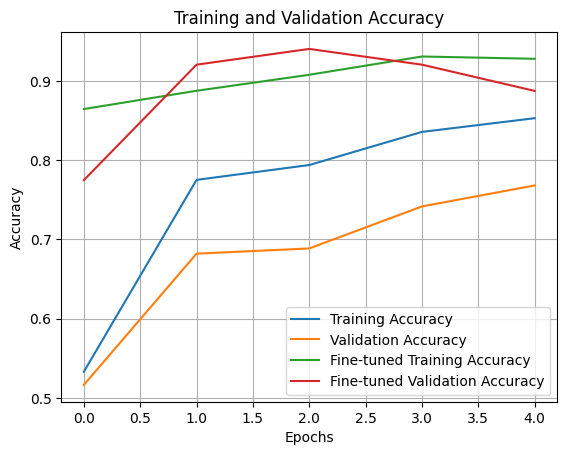

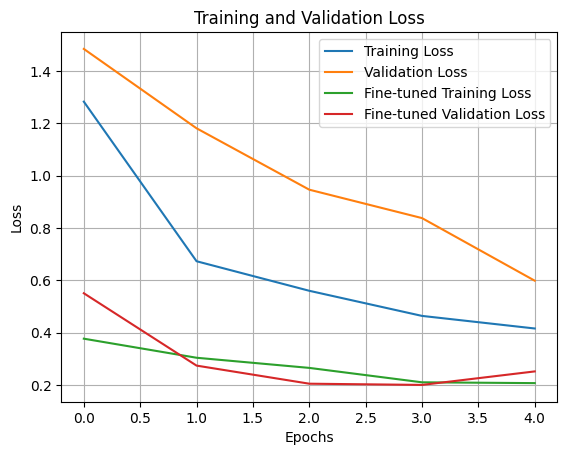

In [16]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-tuned Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tuned Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Fine-tuned Training Loss')
plt.plot(history_fine.history['val_loss'], label='Fine-tuned Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

### Explanation:

- `plt.plot`: Plots the accuracy and loss for training and validation over epochs.
  
- Visual comparison shows if the model is overfitting, underfitting, or learning effectively.


<h3>Task 9: Test model predictions on sample images and visualize results</h3>


**Explanation:** Makes predictions on a few test images and displays them with the model's predicted class.


Class Index Mapping: {'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


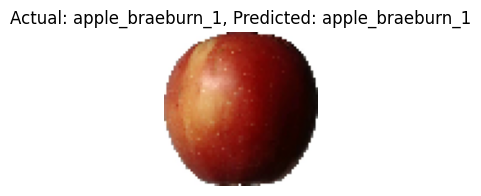

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


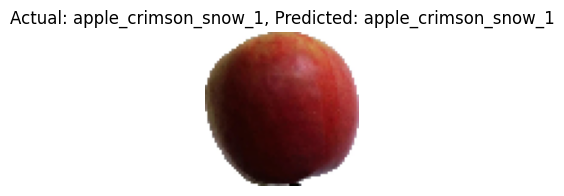

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


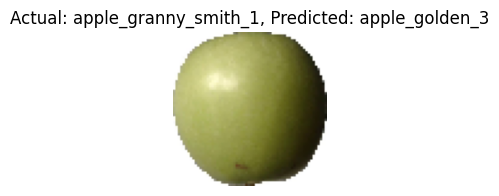

In [19]:
import os
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Initialize counters for actual and predicted classes
actual_count = Counter()
predicted_count = Counter()

# Function to get class name from predicted index
def get_class_name_from_index(predicted_index, class_index_mapping):
    """Convert predicted index to class name."""
    for class_name, index in class_index_mapping.items():
        if index == predicted_index:
            return class_name
    return "Unknown"  # Default if index is not found

# Define the function for visualization
def visualize_prediction_with_actual(img_path, class_index_mapping):
    # Extract the true label dynamically from the directory structure
    class_name = os.path.basename(os.path.dirname(img_path))  # Extract folder name (class)
    
    # Load and preprocess the image
    img = load_img(img_path, target_size=(64, 64)) 
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction, axis=-1)[0]
    predicted_class_name = get_class_name_from_index(predicted_index, class_index_mapping)

    # Update the counters
    actual_count[class_name] += 1
    predicted_count[predicted_class_name] += 1

    # Visualize the image with predictions
    plt.figure(figsize=(2, 2), dpi=100)
    plt.imshow(img)
    plt.title(f"Actual: {class_name}, Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

# Retrieve class index mapping from the training generator
class_index_mapping = train_generator.class_indices
print("Class Index Mapping:", class_index_mapping)  # Debugging: Check the mapping

# Define a list of image paths without hardcoded labels
sample_images = [
    'fruits-360-original-size/fruits-360-original-size/Test/apple_braeburn_1/r0_11.jpg',
    'fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r0_11.jpg',
    'fruits-360-original-size/fruits-360-original-size/Test/apple_granny_smith_1/r0_103.jpg',
]


# Run the predictions and visualization
for img_path in sample_images:
    visualize_prediction_with_actual(img_path, class_index_mapping)


### Explanation:

- `visualize_prediction`: Loads an image, preprocesses it, predicts its class, and displays it.
  
- `model.predict(img_array)`: Uses the trained model to make predictions on unseen images.

##### If there is an incorrect prediction during testing, the following factors could contribute to the misclassification:

Class Similarity: Visually similar fruit classes (e.g., apple types) can confuse the model.

Insufficient Data: Imbalanced datasets with fewer samples for certain classes may cause underfitting.

Limited Training: Fine-tuning fewer layers might not capture sufficient class-specific features.

Data Augmentation Impact: Aggressive augmentations may distort key features, reducing accuracy for specific images.


### Conclusion 


In this lab, you implemented a fruit classification model using transfer learning with VGG16. By fine-tuning and using data augmentation, you developed a robust classifier that can recognize different fruits. This lab demonstrated the efficiency of transfer learning in achieving high accuracy with minimal training data.


### Author

Skills Network


Copyright © IBM Corporation. All rights reserved.
